In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv')
data.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [83]:
data.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [84]:
data.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,Parch,Fare,Survived
0,3,male,22.0,0,7.2500,0
1,1,female,38.0,0,71.2833,1
2,3,female,26.0,0,7.9250,1
3,1,female,35.0,0,53.1000,1
4,3,male,35.0,0,8.0500,0


In [85]:
target = data['Survived']
inputs = data.drop('Survived', axis=1)

In [86]:
dummies = pd.get_dummies(inputs.Sex)
dummies = dummies.astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [87]:
inputs = pd.concat([inputs, dummies], axis='columns')   
inputs.head() 

,Pclass,Sex,Age,Parch,Fare,female,male
0,3,male,22.0,0,7.2500,0,1
1,1,female,38.0,0,71.2833,1,0
2,3,female,26.0,0,7.9250,1,0
3,1,female,35.0,0,53.1000,1,0
4,3,male,35.0,0,8.0500,0,1


In [88]:
inputs.drop('Sex', axis=1, inplace=True)
inputs.head()   

,Pclass,Age,Parch,Fare,female,male
0,3,22.0,0,7.2500,0,1
1,1,38.0,0,71.2833,1,0
2,3,26.0,0,7.9250,1,0
3,1,35.0,0,53.1000,1,0
4,3,35.0,0,8.0500,0,1


In [89]:
inputs.columns[inputs.isna().any()] #is there any NaN value in the columns

Index(['Age'], dtype='object')

In [90]:
inputs.fillna(inputs.Age.mean(), inplace=True) #fill NaN values with the mean of the column
inputs.columns[inputs.isna().any()] #is there any NaN value in the columns

Index([], dtype='object')

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)  

In [92]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()

In [93]:
model.fit(X_train, y_train)

GaussianNB()

In [94]:
model.score(X_test, y_test) #accuracy of the model

0.8212290502793296

In [95]:
first10 = []
first10 = y_test[:10]
first10 = first10.to_numpy()    
first10

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [96]:
model.predict(X_test[:10])

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[91, 13],
       [19, 56]], dtype=int64)

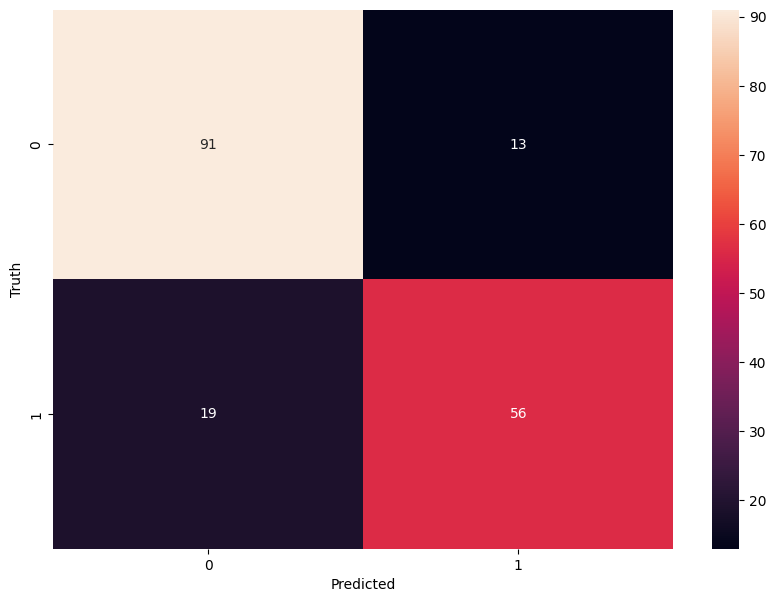

In [98]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()